In [2]:
import numpy as np
import sklearn as sk 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale #nomrmalization lib/ensures all values are in the same scale +accurancy 
import random 


In [3]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38609.0,-1.386475,-0.399955,1.928950,0.027095,0.820498,-1.248363,0.094442,0.075116,0.049636,...,-0.110036,-0.612836,0.154794,0.388647,0.012612,0.026040,0.001266,0.125637,39.95,0
1,68180.0,-0.509222,0.827473,1.523591,-0.180230,0.043173,-0.137487,0.428838,0.302291,-0.437522,...,-0.163521,-0.488631,0.019761,-0.041720,-0.344885,0.088420,0.267258,0.104574,5.34,0
2,130719.0,2.050541,-0.364329,-2.542955,-0.729276,2.388357,3.318051,-0.479005,0.791533,0.403362,...,-0.293302,-0.834855,0.381652,0.698185,-0.264835,0.219264,-0.052150,-0.066923,0.99,0
3,162904.0,-0.403281,0.712978,1.241986,-0.768586,0.396750,1.253678,-0.336713,-0.428081,0.316635,...,0.953022,0.437784,-0.086852,-0.190511,-0.650369,-0.401489,0.292786,0.207524,8.96,0
4,96188.0,2.090140,-0.287030,-1.538081,0.033354,0.566603,0.343100,-0.295259,-0.025139,2.331127,...,-0.102266,0.181281,-0.057100,-0.367538,0.287409,0.170958,-0.067599,-0.083926,6.50,0


In [4]:
fraud=df.loc[df['Class']==1]
normal=df.loc[df['Class']==0]
print(len(fraud))
print(len(normal))

492
284315


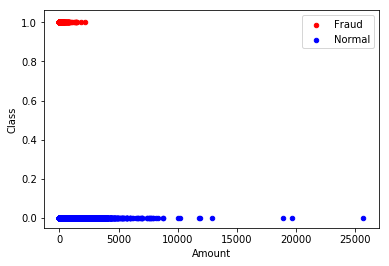

In [5]:
ax=fraud.plot.scatter(x='Amount',y='Class',color='Red',label='Fraud')
normal.plot.scatter(x='Amount', y='Class',color='Blue',label='Normal',ax=ax)
plt.show()

In [ ]:
#Machine Learning
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns


In [ ]:
x= df.iloc[:,:-1]
y= df['Class']
# print(x.head())
# print(y.head())


In [27]:
log=[]
lin=[]
a=[0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5]
for k in a:  
    x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=k)   
    logistic=linear_model.LogisticRegression(C=1e5)
    logistic.fit(x_train,y_train ) 
#     print('Score: ',logistic.score(x_test,y_test))
    log.append(logistic.score(x_test,y_test))
    
    linear=linear_model.LinearRegression()
    linear.fit(x_train,y_train)
    lin.append(linear.score(x_test,y_test))
#     print('Linear Score',linear.score(x_test,y_test))
# sns.lmplot(x='Kval', y='Score', data=logistic.score(x_test,y_test))

/home/konstantinos/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/konstantinos/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/konstantinos/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/konstantinos/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/konstantinos/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

In [26]:
print(log)
print(lin)
print(a)

[0.9990168999578671, 0.9990871107053826, 0.9989326142524086, 0.9990637032875719, 0.9990168835207608, 0.9988413226477533, 0.9989544645922412, 0.9989887924496503]
[0.5203369139667264, 0.5126256677739012, 0.5208440284095546, 0.5105578068441157, 0.5499132101700026, 0.524969677930475, 0.5261690270825579, 0.5256123187302765]
0.5


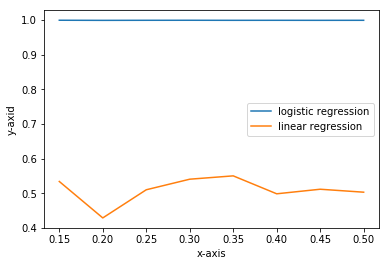

In [30]:
plt.plot(a,log, label='logistic regression')
plt.plot(a,lin, label='linear regression')
plt.xlabel('x-axis')
plt.ylabel('y-axid')
plt.legend()
plt.show()